# Обучение Doctr

### Подготовка

In [ ]:
import os
import torch
from doctr.models import db_resnet50, parseq, master, crnn_mobilenet_v3_small, ocr_predictor
from doctr.io import DocumentFile
from doctr.datasets.vocabs import VOCABS

Загружаем модифицированную библиотеку doctr

In [50]:
if not os.path.exists('doctr'):
  !git clone https://github.com/something-original/doctr

In [51]:
os.chdir('doctr')

In [ ]:
!pip install .

In [53]:
os.chdir('..')

Запускаем процесс обучения

In [ ]:
if 'models' not in os.listdir():
  !mkdir models

In [ ]:
os.chdir('doctr')

### Обучение моделей

Фреймворк позволяет загружать модели на HuggingFace с помощью параметра push-to-hub

In [ ]:
train = True

In [72]:
if train:
  !python references/recognition/train_pytorch.py crnn_mobilenet_v3_small --train_path ../train --val_path ../val --vocab russian --epochs 10 --name ocr_crnn_mobilenet_v3_small  --device 0 --pretrained --push-to-hub
  !mv ocr_crnn_mobilenet_v3_small.pt ../models/

python3: can't open file '/content/doctr/doctr/references/recognition/train_pytorch.py': [Errno 2] No such file or directory
mv: cannot stat 'ocr_crnn_mobilenet_v3_small.pt': No such file or directory


In [ ]:
if train:
  !python references/recognition/train_pytorch.py parseq --train_path ../train --val_path ../val --vocab russian --epochs 10 --name doctr_parseq --pretrained --device 0 --push-to-hub
  !mv doctr_parseq.pt ../models/

In [ ]:
if train:
  !python references/recognition/train_pytorch.py master --train_path ../train --val_path ../val --vocab russian --epochs 10 --name doctr_master --pretrained --device 0 --push-to-hub
  !mv doctr_master.pt ../models/

### Тест моделей

Если не были обучены - загружаем с HF

In [ ]:
os.chdir('../models')

In [ ]:
if 'ocr_crnn_mobilenet_v3_small.pt' not in os.listdir('.'):
  !wget https://huggingface.co/smthrgnl/ocr_crnn_mobilenet_v3_small/resolve/main/ocr_crnn_mobilenet_v3_small.pt
if 'doctr_master.pt' not in os.listdir('.'):
  !wget https://huggingface.co/smthrgnl/doctr_master/resolve/main/doctr_master.pt
if 'doctr_parseq.pt' not in os.listdir('.'):
  !wget https://huggingface.co/smthrgnl/doctr_parseq/resolve/main/doctr_parseq.pt

In [ ]:
os.chdir('..')

In [ ]:
os.environ["USE_TORCH"] = "1"

In [ ]:
detection_model = db_resnet50(pretrained=True, pretrained_backbone=False)

/usr/local/lib/python3.10/dist-packages/doctr/models/utils/pytorch.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archive_path, map_location="c

Ocr_crnn_mobilenet_v3_small

In [ ]:
recognition_model = crnn_mobilenet_v3_small(pretrained=False, pretrained_backbone=False, vocab=VOCABS['russian'])
recognition_params = torch.load("models/ocr_crnn_mobilenet_v3_small.pt", map_location="cuda:0", weights_only=False)
recognition_model.load_state_dict(recognition_params, strict=False)
ocr_model = ocr_predictor(detection_model, recognition_model)

In [ ]:
pdf_doc = DocumentFile.from_pdf("sample.pdf")

In [ ]:
result = ocr_model(pdf_doc)

In [ ]:
rendered_text = result.render()

In [ ]:
print(rendered_text)

НЛМК
Регистр. № 5125
№ договора SАР
0XXXXXXXXZV6SUе
Спецификация
4600080528 Стр- 1 И3 3
СПЕЦИОИКАЦИЯ 4600080528 oтdаtеd
количественная
Поставщик  SuррIег
дейстауют С
01.2.2022 Покупатель I Вuуег
Сhопgqjпg RuпjI Faг Еast АIоу Со.Цtd.
ПО
31.01.2023 пуоличное акционерное бщестововлнивниюк
400021 Китай. Хонг-кин, СНОNGОING. Кдоговору №
металлургическни комбинатАО "нлМк"/
Адрес 7
21-1. ВuIIding А. Finаnciа! СепtеrNо. 27
№ОУОЦРЕТSК SТЕЕLМЦИК
Addгеss:
JN--NLмК-7020Л0
Wеst Strееt апдое, Ruпj!
7
398040. РО. Липецкая область Г.
Адрес
от 02.12.2020 Г. АаагеSс:
Липецк, ПЛ. Металлургов, 274 398040. RU.
Код поставщика/ Соdе оf
2000206101
SРЕСIFСАТОМ 4600080528
Цреtsк RЕGIОМ. Цреtsk. pL МеtаIuгgоv 2
SuррIег
gшапигацие
Контактное лицо/
контактное лицо/
То Соптгась №
Прусова Дарья витальевна
Слапg YI
Соптасt регSоп:
Соптасt регSоп:
СRF-NLМК-2020Л0
телефон 7 Рhопе: 479091223-88-29
контактная информация  Соntасt info
dаtеd 02.2.2020 Е-mай:
рпыоия.аиескепысат
(NИNОYеCОRИKИОМ
vаIid fгоп
01.12.2022 Группа з

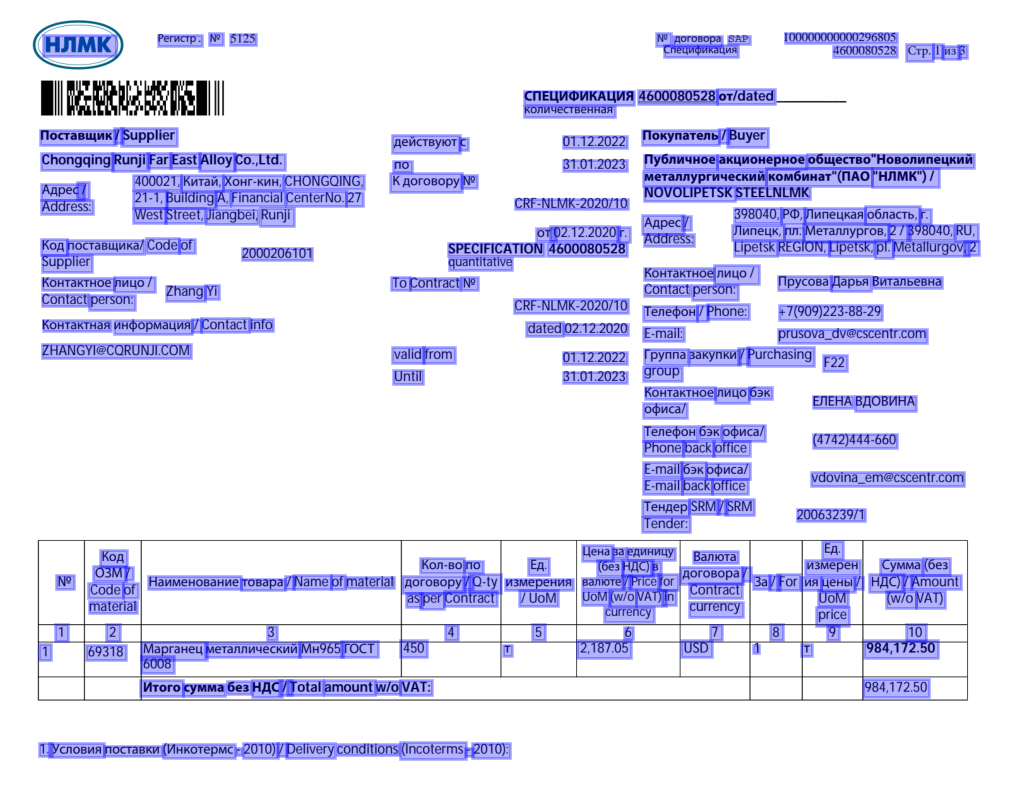

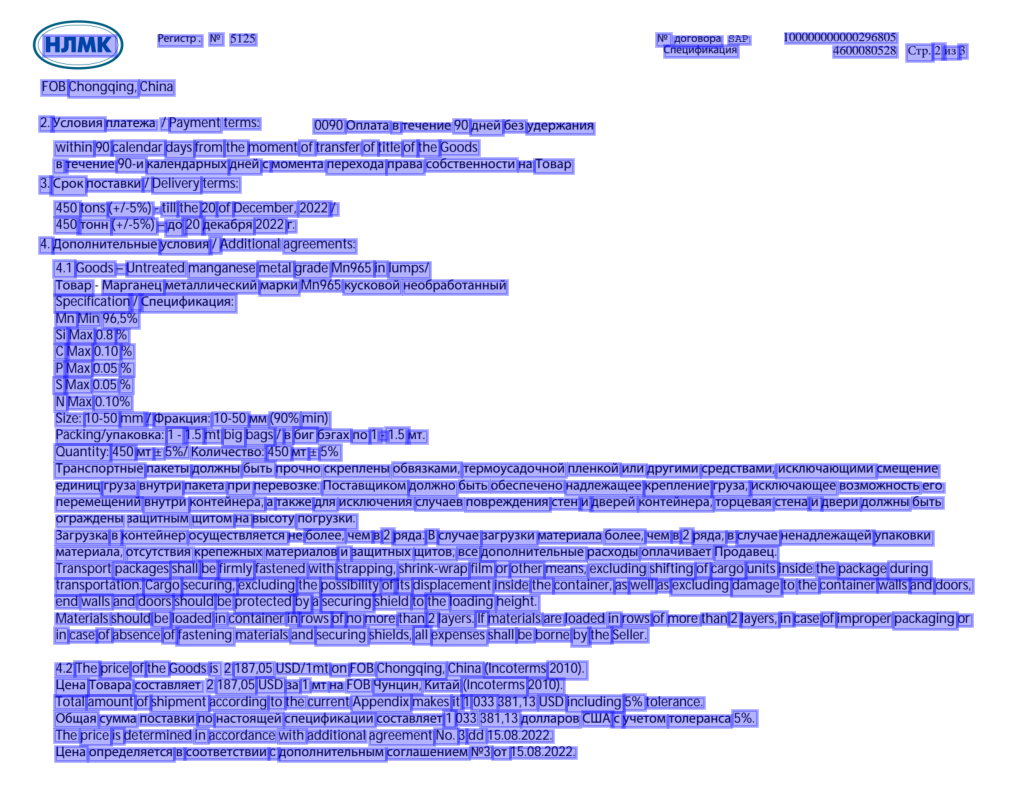

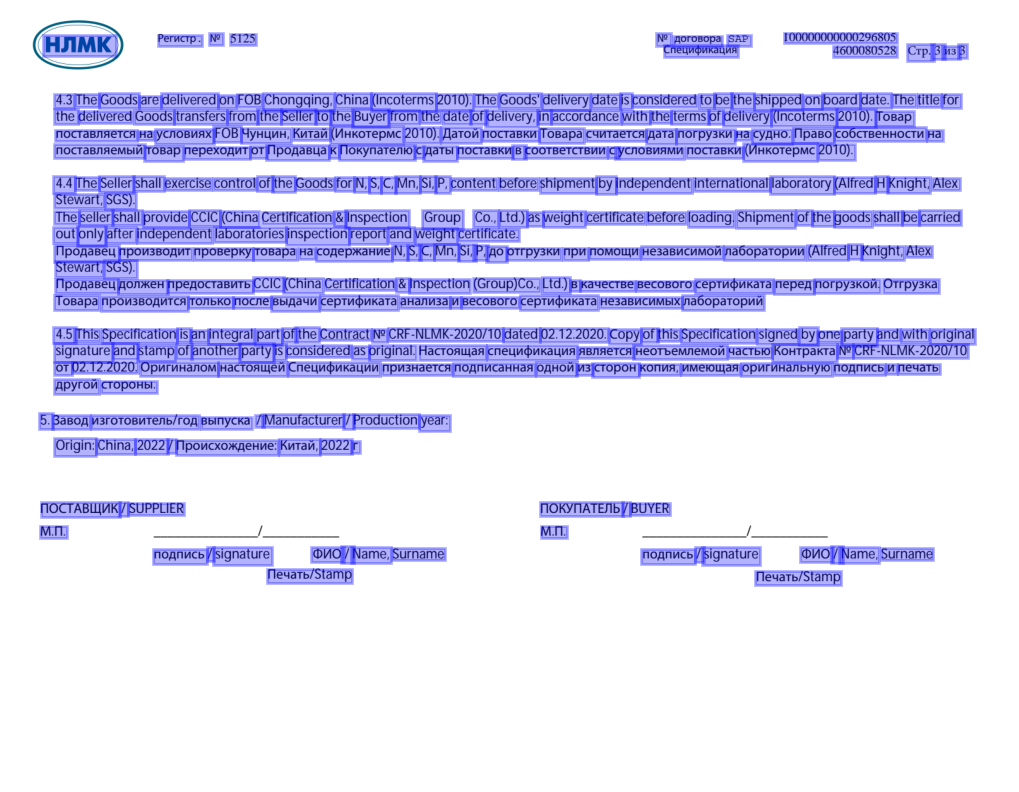

In [ ]:
result.show()

Parseq

In [ ]:
recognition_model = parseq(pretrained=False, pretrained_backbone=False, vocab=VOCABS['russian'])
recognition_params = torch.load("models/doctr_parseq.pt", map_location="cuda:0", weights_only=False)
recognition_model.load_state_dict(recognition_params, strict=False)
ocr_model = ocr_predictor(detection_model, recognition_model)

In [ ]:
result = ocr_model(pdf_doc)

In [ ]:
rendered_text = result.render()
print(rendered_text)

НЛМК
Регистр. №1 5125
№1 договора SАР
(ОХХХXXXXXX296805
Спецификация
4600080528 Стр. 1 из 3
СПЕЦИФИКАЦИЯ 4600080528 oт/dated
количественная
Поставщик I SиррIiег
действуют C
01.12.2022 Покупатель I Виуег
Chongqing Runji Fаг Еast AIIoy Co.jLtd.
по
31.01.2023 Публичное акционерное общество"новолилецини
400021, Китай, Хонг-кин, СНОNGQlNG, Кдоговору №1
металлургический комбинат(ПАO "нлмк")
Адрес I
21-1, BuiIding А. FiпапсiaI Сепtег№о. 27
NОVОLlРЕТSК SТЕЕLNLMK
Address:
СRF-NLMK-Z0Z0л0
West Street, Jiапдей, Runji
I
398040, РФ, Липецкая область, Г.
Адрес
от 02.12.2020 Г. Address:
Липецк, ПЛ. Металлургов, 273 398040, RU,
Код поставщика/ Софе of
2000206101
SРЕСIFIСАТЮN 4600080528
Lipetsk RЕGlОМ, Lipetsk, pl. MetaIIurgov, 2
SиррIiег
диаптитатие
Контактное лицо/
Контактное лицо/
То Сопtгаст №1
Прусова Дарья Зитальевна
Zhапg Yi
Соптаст регзоп:
Сопtаст регзоп:
СRF-NLМK-202010
Телефон I Phone: -7(909)223-88-29
Контактная информация I Сопtаст info
dated 02.12.2020 Е-тай:
ргизоvа_dvесзсепtг.соm
ZНАNGYl

Master

In [ ]:
recognition_model = master(pretrained=False, pretrained_backbone=False, vocab=VOCABS['russian'])
recognition_params = torch.load("models/doctr_master.pt", map_location="cuda:0", weights_only=False)
recognition_model.load_state_dict(recognition_params, strict=False)
ocr_model = ocr_predictor(detection_model, recognition_model)

In [ ]:
result = ocr_model(pdf_doc)

In [ ]:
rendered_text = result.render()
print(rendered_text)

НЛМК)
Регистр. № 5125
№ договора SАР
lОООООООХИООООZУОВО»
Спецификация
4600080528 Стр. 1 из 3
СПЕЦИФИКАЦИЯ 4600080528 orldated
количественная
Поставщик I Sиррliег
действуют C
01.12.2022 Покупатель  Виуег
Chongqing Runji Far East AIюу Со._td.
по
31.01.2023 публичное акционерное общдествотноволипецимим
400021, Китай, Хонг-кин, CHONGOlNGh Кдоговору №
металлургическии комбинат(ПАо "НЛМК"
Адрес V
21-1. Building A, Finanсia/ CenterNo. 27
МОVОЦРЕТСК ЗТЕЕLNСМК
Addrеss:
СК-NLМК-2UZОПО
West Streеt, Jйапдбей, Runji
I
398040, РФ, Липецкая область, г.
Адрес
ото 02.12.2020 г. Addгеяя:
Липецк, пл. Металлургов, 2/3 398040, RU,
Код поставщика/ Code of
2000206101
ЯРЕСИГИСАТИОМ 4600080528
Lipetsk РЕGlОМ, Lipetsk, p. Mеtапигgоv, 2
Sиррliег
qиаптитатюе
Контактное лицо/
Контактное лицо/
To Сопtгасt №
Прусова Дарья витальевна
Zнапg Yi
соптаст регзоп:
Соntасt регзоп:
СRF-NLMк-2020.10
Телефон  Рнопе: 47909д23-88-29
Контактная информация  Contact info
dated 02.12.2020 Е-mай!
ргu5OVа_dV@CSCеnt.cOm
ZНАNСУИЕСОRUNЛ